In [86]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime
import time

In [247]:
ds1 = pd.read_csv('ritual-ds1.csv')
ds2 = pd.read_csv('ritual-ds2.csv')

In [275]:
ds1[(ds1["Zone"] == 'C') & (ds1["Order Status"] == 'ACCEPTED')].groupby("Order Date").count()

,Order Time,User,Merchant,Order Status,Merchant Response (min),Order Value ($),Zone,Ritual Estimated Prep Time (min),Response Time (min:sec),Order Time 2
Order Date,,,,,,,,,,
8/31/2015,726,726,726,726,726,726,726,726,726,726
9/1/2015,737,737,737,737,737,737,737,737,737,737
9/2/2015,732,732,732,732,732,732,732,732,732,732
9/3/2015,720,720,720,720,717,720,720,720,720,720


In [32]:
ds1[(ds1["Order Date"] == '8/31/2015') & (ds1["Response Time"])].shape[0] / ds1[ds1["Order Date"] == '8/31/2015'].shape[0]

916

In [13]:
ds1

,Order Date,Order Time,User,Merchant,Order Status,Merchant Response (min),Order Value ($),Zone,Ritual Estimated Prep Time (min),Response Time (min:sec)
0,8/30/2015,7:22 PM,Lily Buckland,The Vintage Afternoon,ACCEPTED,15.0,11.30,E,10,0:14
1,8/30/2015,7:47 PM,Caroline Mitchell,The Jazz Laguna,REJECTED,NaN,8.60,C,15,10:18
2,8/30/2015,7:13 PM,Lily Buckland,The Southern Balcony,REJECTED,NaN,4.19,E,5,0:36
3,8/30/2015,7:11 PM,Lily Buckland,The Southern Balcony,REJECTED,NaN,4.19,E,5,0:23
4,8/30/2015,7:16 PM,Lily Buckland,The Southern Balcony,REJECTED,NaN,4.19,E,5,0:17
5,8/30/2015,7:17 PM,Lily Buckland,The Southern Balcony,REJECTED,NaN,4.19,E,5,0:09
6,8/31/2015,4:25 PM,Victoria Lewis,Amigos,ACCEPTED,15.0,79.10,C,10,1:26
7,8/31/2015,12:29 PM,Gabrielle Hodges,The Lighthouse,ACCEPTED,15.0,57.62,E,15,1:03
8,8/31/2015,10:55 AM,James Dickens,Charm,ACCEPTED,20.0,54.01,C,15,1:26
9,8/31/2015,10:30 AM,Nicola Sutherland,Amigos,ACCEPTED,15.0,49.72,C,10,0:22


In [58]:
ds1["response_time"] = ds1["Response Time (min:sec)"].fillna('59:59')
ds1["response_time"] = ds1.apply(convert_to_time, axis=1)

ValueError: ('unconverted data remains: :00', 'occurred at index 288')

In [128]:
def convert_to_time(df):
    value = df["Order Time"]
    return datetime.time.strptime(value, "%I:%M %p")


def take_str_slice(df):
    value = df["response_time"]
    return len(value)


In [60]:
ds1["response_time"][288]

'0:31:00'

In [55]:
ds1[ds1["response_time"].str]["response_time"]

'99:99'

In [61]:
ds1["response_time"].str.

In [63]:
ds1["temp"] = ds1.apply(take_str_slice, axis=1)

In [114]:
ds1[ds1["temp"]>5]

,Order Date,Order Time,User,Merchant,Order Status,Merchant Response (min),Order Value ($),Zone,Ritual Estimated Prep Time (min),Response Time (min:sec),response_time,temp
288,8/31/2015,4:29 PM,Kimberly MacLeod,Lily,ACCEPTED,20.0,12.37,C,20,0:31:00,0:31:00,7
2554,9/2/2015,5:36 PM,Sonia Buckland,Jubilee,REJECTED,NaN,7.63,C,10,1:12:07,1:12:07,7
3097,9/3/2015,12:22 PM,Ian Taylor,The Juniper Tulip,REJECTED,NaN,13.40,E,10,1:41:22,1:41:22,7
3098,9/3/2015,12:38 PM,Ian Taylor,The Juniper Tulip,REJECTED,NaN,13.40,E,10,1:25:31,1:25:31,7
3171,9/3/2015,11:27 AM,Ruth Clarkson,The Southern Ship,REJECTED,NaN,12.00,A,25,1:45:00,1:45:00,7
3674,9/3/2015,5:17 PM,Amanda Nash,The Jazz Laguna,REJECTED,NaN,5.50,C,15,1:27:28,1:27:28,7


In [88]:
tempds1 = ds1.copy()

In [89]:
tempds1 = tempds1[tempds1["temp"] <= 5]

In [90]:
tempds1["response_time2"] = tempds1.apply(convert_to_time, axis=1)

In [111]:
def check_answer(df):
    value = df["response_time2"]
    return (value.tm_hour == 0) & (value.tm_min < 1)

v = tempds1["response_time2"][0]
(v.tm_hour == 0) & (v.tm_min < 1)

True

In [112]:
tempds1["answer"] = tempds1.apply(check_answer, axis=1)

In [113]:
tempds1["answer"].sum() / (tempds1["answer"].shape[0] + 6)

0.6644959624902318

In [249]:
def convert_to_time(df):
    value = df["Order Time"]
    return time.strptime(value, "%I:%M %p")

ds1["Order Time 2"] = ds1.apply(convert_to_time, axis=1)

In [250]:
start = time.strptime("12:00 PM", "%I:%M %p")
end = time.strptime("2:00 PM", "%I:%M %p")
ds1[(ds1["Order Time 2"] >= start) & (ds1["Order Time 2"] <= end)]

,Order Date,Order Time,User,Merchant,Order Status,Merchant Response (min),Order Value ($),Zone,Ritual Estimated Prep Time (min),Response Time (min:sec),Order Time 2
7,8/31/2015,12:29 PM,Gabrielle Hodges,The Lighthouse,ACCEPTED,15.0,57.62,E,15,1:03,"(1900, 1, 1, 12, 29, 0, 0, 1, -1)"
14,8/31/2015,12:04 PM,Jacob Hamilton,Amigos,ACCEPTED,10.0,40.28,C,10,1:13,"(1900, 1, 1, 12, 4, 0, 0, 1, -1)"
16,8/31/2015,12:14 PM,Kimberly McLean,Amigos,ACCEPTED,5.0,35.00,C,5,0:57,"(1900, 1, 1, 12, 14, 0, 0, 1, -1)"
17,8/31/2015,12:48 PM,Neil Skinner,The Northern Salmon,ACCEPTED,15.0,32.46,C,15,3:52,"(1900, 1, 1, 12, 48, 0, 0, 1, -1)"
20,8/31/2015,12:40 PM,Justin Terry,The Locket,ACCEPTED,10.0,28.82,C,10,0:08,"(1900, 1, 1, 12, 40, 0, 0, 1, -1)"
26,8/31/2015,1:50 PM,Eric Burgess,The Village Panda,ACCEPTED,10.0,27.01,C,10,1:46,"(1900, 1, 1, 13, 50, 0, 0, 1, -1)"
32,8/31/2015,1:00 PM,Faith Nolan,Lily,ACCEPTED,10.0,25.98,C,15,0:39,"(1900, 1, 1, 13, 0, 0, 0, 1, -1)"
33,8/31/2015,12:52 PM,William Hill,Charm,ACCEPTED,20.0,24.75,C,15,1:36,"(1900, 1, 1, 12, 52, 0, 0, 1, -1)"
43,8/31/2015,1:19 PM,Jacob Hamilton,Amigos,ACCEPTED,10.0,20.79,C,10,0:12,"(1900, 1, 1, 13, 19, 0, 0, 1, -1)"
49,8/31/2015,1:34 PM,Jane Hunter,Charm,REJECTED,NaN,19.10,C,15,3:05,"(1900, 1, 1, 13, 34, 0, 0, 1, -1)"


In [269]:
df = ds1[(ds1["Order Time 2"] >= start) & (ds1["Order Time 2"] <= end)]

df[df["Order Status"] != "ACCEPTED"].shape[0] / df.shape[0]

0.043835616438356165

In [262]:
ds1[(ds1["Order Time 2"] > start) & (ds1["Order Time 2"] < end)][ds1["Order Status"] != "ACCEPTED"].shape[0] / ds1[(ds1["Order Time 2"] > start) & (ds1["Order Time 2"] < end)].shape[0]

//anaconda/envs/theDoc/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


0.043835616438356165

In [143]:
ds1[(ds1["Order Time 2"] >= start) & (ds1["Order Time 2"] <= end)][ds1["Order Status"] == "REJECTED"]

//anaconda/envs/theDoc/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,Order Date,Order Time,User,Merchant,Order Status,Merchant Response (min),Order Value ($),Zone,Ritual Estimated Prep Time (min),Response Time (min:sec),response_time,temp,Order Time 2
49,8/31/2015,1:34 PM,Jane Hunter,Charm,REJECTED,NaN,19.10,C,15,3:05,3:05,4,"(1900, 1, 1, 13, 34, 0, 0, 1, -1)"
124,8/31/2015,1:38 PM,Connor Howard,Harvest,REJECTED,NaN,14.92,C,10,0:11,0:11,4,"(1900, 1, 1, 13, 38, 0, 0, 1, -1)"
303,8/31/2015,2:00 PM,Sarah Lewis,Mirage,REJECTED,NaN,12.00,C,5,0:35,0:35,4,"(1900, 1, 1, 14, 0, 0, 0, 1, -1)"
391,8/31/2015,12:02 PM,Tracey Robertson,Karma,REJECTED,NaN,11.00,C,5,1:11,1:11,4,"(1900, 1, 1, 12, 2, 0, 0, 1, -1)"
484,8/31/2015,12:51 PM,Angela Short,The Shining Gate,REJECTED,NaN,9.75,C,10,0:20,0:20,4,"(1900, 1, 1, 12, 51, 0, 0, 1, -1)"
532,8/31/2015,12:15 PM,Faith Smith,Abacus,REJECTED,NaN,9.14,C,5,0:52,0:52,4,"(1900, 1, 1, 12, 15, 0, 0, 1, -1)"
533,8/31/2015,12:09 PM,Faith Smith,Abacus,REJECTED,NaN,9.14,C,5,0:32,0:32,4,"(1900, 1, 1, 12, 9, 0, 0, 1, -1)"
557,8/31/2015,1:46 PM,Michelle Alsop,Veil,REJECTED,NaN,8.98,D,10,10:15,10:15,5,"(1900, 1, 1, 13, 46, 0, 0, 1, -1)"
623,8/31/2015,12:16 PM,Faith Smith,Abacus,REJECTED,NaN,8.01,C,5,1:15,1:15,4,"(1900, 1, 1, 12, 16, 0, 0, 1, -1)"
685,8/31/2015,12:42 PM,Nathan Peters,The Caramel Court,REJECTED,NaN,6.99,C,5,1:15,1:15,4,"(1900, 1, 1, 12, 42, 0, 0, 1, -1)"


In [166]:
datetime.date(2015,8,7).weekday()

4

In [154]:
(datetime.date(2015,8,23) - datetime.date(2015,8,7))

datetime.timedelta(16)

In [155]:
(datetime.date(2015,9,20) - datetime.date(2015,8,23))

datetime.timedelta(28)

In [177]:
pre_aug23_mtof_nl =  5 * 5 * 10.75 * 11
pre_aug23_mtof_l = 2 * 7 * 10.75 * 11
pre_aug_23_weekend_nl = 5.5 * 5 * 10.75 * 5
pre_aug_23_weekend_l =  2 * 7 * 10.75 * 5

post_aug23_mtof_nl = 5 * 5 * 12.09375 * 20
post_aug23_mtof_l =  2 * 7 * 12.09375 * 20
post_aug_23_weekend_nl =  5.5 * 5 * 12.09375 * 9
post_aug_23_weekend_l =  2 * 7 * 12.09375 * 9

In [178]:
pre_aug23_mtof_nl + pre_aug23_mtof_l + pre_aug_23_weekend_nl + pre_aug_23_weekend_l + post_aug23_mtof_nl + post_aug23_mtof_l + post_aug_23_weekend_nl + post_aug_23_weekend_l

20792.515625

In [162]:
1.125 * 10.75

12.09375

In [205]:
def convert_to_date(df):
    value = df["Datestamp"]
    return datetime.datetime.strptime(value, "%m/%d/%Y").date()


def map_rating(df, column):
    _map = {
        "great":1,
        "needs improvement":0
    }
    value = df[column].lower()
    return _map[value]

In [184]:
ds2["Datestamp 2"] = ds2.apply(convert_to_date, axis=1)

In [195]:
ds2[(ds2["Datestamp 2"] >= datetime.date(2015,11,16)) & (ds2["Datestamp 2"] <= datetime.date(2015,11,20))]["Rating out of 5"].astype(int).mean()

4.419213973799127

In [200]:
ds2["Timing Accuracy"].unique()

array(['Great', 'Needs Improvement'], dtype=object)

1    561
0     80
Name: App Experience, dtype: int64
641


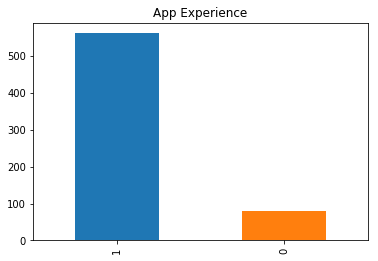

1    543
0     98
Name: Pickup Experience, dtype: int64
641


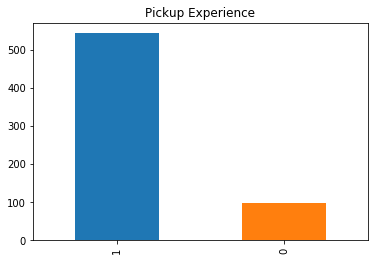

1    575
0     66
Name: Timing Accuracy, dtype: int64
641


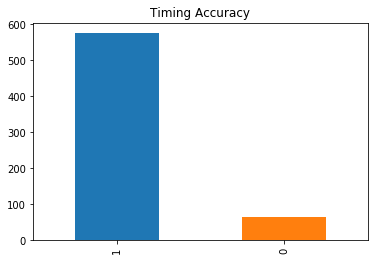

1    583
0     58
Name: Order Quality, dtype: int64
641


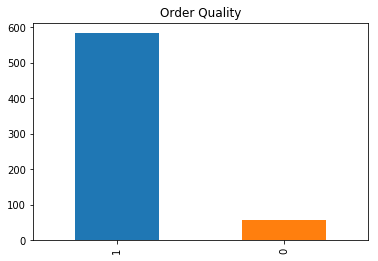

In [209]:
tempds2 = ds2.copy()

for column in ["App Experience", "Pickup Experience", "Timing Accuracy", "Order Quality"]:
    
    tempds2[column] = tempds2.apply(map_rating, axis=1, args=[column])
    print(tempds2[column].value_counts())
    print(tempds2[column].value_counts().sum())
    tempds2[column].value_counts().plot.bar()
    plt.title(column)
    plt.show()

In [225]:
beta = ds2.set_index("Restaurant visited:")

all = beta[["Rating out of 5"]].groupby("Restaurant visited:").mean()

In [243]:
ratings = {}

for column in ["App Experience", "Pickup Experience", "Timing Accuracy", "Order Quality"]:
    
    df = beta[[column]]
    df[column] = df.apply(map_rating, axis=1, args=[column])
    all = all.join(df.groupby("Restaurant visited:").mean())

//anaconda/envs/theDoc/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [246]:
all[(all["Rating out of 5"] >= 4.5) & (all["App Experience"] >= 0.9) & (all["Pickup Experience"] >= 0.9) & (all["Timing Accuracy"] >= 0.9) & (all["Order Quality"] >= 0.9)].shape[0]

30